# Project: TMDB 5000 Movie Dataset Investegate

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> **Descriptions:** This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


 **columns descriptions:**

- **id**: the unique identifier for each movie.
- **imdb_id**: the unique identifier for each movie on IMDB website.
- **popularity**:popularity for each movie.
- **budget**: Movie budget.
- **revenue**: Movie revenue.
- **original_title**: Movie Title.
- **cast**: Movie cast.
- **homepage**: Movie webpage link.
- **director**: Movie director.
- **tagline**: Movie tagline.
- **keywords**:Movie keywords.
- **overview**: Movie overview.
- **runtime**: Movie run times.
- **genres**: Movie genres.
- **production_companies**: Movie production 
- **release_date**: Movie release date (month/day/year). 
- **vote_count**: Movie vote count.
- **vote_average**: Movie vote average.
- **release_year**:Movie release year.
- **budget_adj**: Movie budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
- **revenue_adj**: Movie revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


## **Questions:**

* 1 - What's the most popular movies? (top 10)
* 2 - What's the top rated movies considering both (vote_count) and (vote average)? (top 10)
* 3 - Which movies have the highest runtime? (top 10)
* 4 - Which year and which Month released highest number of movies?
* 5 - Which genre has the highest movies release?
* 6 - Which movie has the highest budget?
* 7 - Which movie made the highest revenue?
* 8 - Which movie made the highest profit?
* 9 - which production company made highest profit and which one has the highest budget?
* 10 - Is there a correlation between budget and profit?
* 11 - Is there a correlation between popularity and profit?
* 12 - Is there a correlation between runtime and profit?
* 13 - Is there a correlation between vote_count and popularity?
* 14 - Is there a correlation between vote_count and profit?

### importing libraries that will be used to investigate Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import time
sns.set_style("darkgrid")

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [2]:
# loading CSV files into Dataframe  //movies//

movies = pd.read_csv("tmdb-movies.csv")

In [3]:
#checking 5 rows sample from Dataframe

movies.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4125,21868,tt0298856,0.206832,0,0,Evelyn,Pierce Brosnan|Sophie Vavasseur|Aidan Quinn|Ju...,NaN,Bruce Beresford,NaN,...,Desmond Doyle is devastated when his wife aban...,92,Drama|Foreign,CineEvelyn,12/13/02,15,6.9,2002,0.0,0.0
6657,19595,tt0820142,0.720101,0,0,Shark Bait,Freddie Prinze Jr.|Rob Schneider|Evan Rachel W...,NaN,Howard E. Baker|John Fox|Kyungho Lee,NaN,...,"After losing everything, a young fish, Pi, goe...",77,Animation|Family,Silver Nitrate Films|Wonderworld Studios|Digi ...,7/7/06,25,4.9,2006,0.0,0.0
9819,27361,tt0072709,0.451933,0,0,Black Moon,Cathryn Harrison| Therese Giehse|Alexandra Ste...,NaN,Louis Malle,An apocalyptic Alice in Wonderland!,...,There is a war in the world between the men an...,100,Fantasy|Science Fiction,Bioskop-Film GmbH|Nouvelles Ã‰ditions de Films...,9/24/75,16,6.4,1975,0.0,0.0
10166,21240,tt0053699,0.136525,0,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,...,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,2/22/60,10,6.0,1960,0.0,0.0
480,353610,tt4151192,0.270408,0,0,The Condemned 2,Wes Studi|Steven Michael Quezada|Monique Cande...,NaN,Roel ReinÃ©,The world's deadliest game is back online,...,A former bounty hunter who finds himself on th...,90,Action,WWE Studios,11/6/15,13,4.0,2015,0.0,0.0


### Assessing Data

In [4]:
#checking Dataframe basic informations (columns names, number of values, data types ......)

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#checking Dataframe shape (number of rows and columns)

movies.shape

(10866, 21)

In [6]:
#checking more information and descriptive statistics

movies.describe().round()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.0,10866.0,10866.0,1.086600e+04,10866.0,10866.0,10866.0,10866.0,10866.0,1.086600e+04
mean,66064.0,1.0,14625701.0,3.982332e+07,102.0,217.0,6.0,2001.0,17551040.0,5.136436e+07
std,92130.0,1.0,30913214.0,1.170035e+08,31.0,576.0,1.0,13.0,34306156.0,1.446325e+08
min,5.0,0.0,0.0,0.000000e+00,0.0,10.0,2.0,1960.0,0.0,0.000000e+00
25%,10596.0,0.0,0.0,0.000000e+00,90.0,17.0,5.0,1995.0,0.0,0.000000e+00
50%,20669.0,0.0,0.0,0.000000e+00,99.0,38.0,6.0,2006.0,0.0,0.000000e+00
75%,75610.0,1.0,15000000.0,2.400000e+07,111.0,146.0,7.0,2011.0,20853251.0,3.369710e+07
max,417859.0,33.0,425000000.0,2.781506e+09,900.0,9767.0,9.0,2015.0,425000000.0,2.827124e+09


In [7]:
# checking for NaN values patients

movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#checking for duplicated rows 

movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
# checking budget_adj 0 values count

movies[movies.budget_adj == 0]["id"].count()

5696

In [10]:
# checking revenue 0 values count

movies[movies.revenue == 0]["id"].count()

6016

##  Cleaning Data

### <font color='blue'>Missing Data</font>
 
1. homepage column has 7930 NaNs (empty_value).
2. tagline column has 2824 NaNs (empty_value).
3. keywords column has 1493 NaNs (empty_value).
4. budget_adj column has too much decimals.
5. revenue_adj column has too much decimals.
6. budget_adj column has 5696 record with value "0"
7. revenue_adj column has 6016 record with value "0"
8. genres column has 23 NaNs (empty_value).



### <font color='blue'>Quality issues</font>

1. id column data type is integer not string.
2. release_date column data type is string not datetime.
3. There's a duplicate record for "TEKKEN" movie.
4. We need to add new column ["profit"] to calculate every movie profit.
5. We need to add new column ["month"].
6. Unnecessary columns ["imdb_id","budget","revenue"].

In [11]:
# Make copy of origenal dataframe to clean

movies_clean = movies.copy()

### <font color='blue'>Missing Data issues</font>

#### 1. homepage column has 7930 NaNs (empty_value) of total records 10866.

##### Solution
* Drop homepage column using `.drop()` method.

##### Code

In [12]:
# Drop homepage column

movies_clean.drop("homepage", axis=1, inplace = True)

##### Test

In [13]:
# confirm that column already dropped

"homepage" in movies_clean.columns 

False

#### 2. tagline column has 2824 empty value(NaNs) of total records 10866.

##### Solution
* Drop tagline column using `.drop()` method.

##### Code

In [14]:
# Drop tagline column

movies_clean.drop("tagline", axis=1, inplace = True)

##### Test

In [15]:
# confirm that column already dropped

"tagline" in movies_clean.columns  

False

#### 3. keywords column has 1493 empty value(NaNs) of total records 10866.

##### Solution
* Drop keywords column using `.drop()` method.

##### Code

In [16]:
# Drop keywords column

movies_clean.drop("keywords", axis=1, inplace = True)

##### Test

In [17]:
# confirm that column already dropped

"keywords" in movies_clean.columns  

False

#### 4. budget_adj column has too much decimals.

##### Solution
* Round all numbers using `round()` method.

##### Code

In [18]:
# round all numbers to just 2 decimals

movies_clean.budget_adj = movies_clean.budget_adj.apply(lambda x : round(x,2))

##### Test

In [19]:
#confirm that values already rounded.

movies_clean.budget_adj.sort_values().sample(5)

3791          0.00
5968    7488266.82
3723          0.00
1125          0.00
3634          0.00
Name: budget_adj, dtype: float64

#### 5. revenue_adj column has too much decimals.

##### Solution
* Round all numbers using `.round()` method.

##### Code

In [20]:
movies_clean.revenue_adj = movies_clean.revenue_adj.apply(lambda x : round(x,2))

##### Test

In [21]:
#confirm that values already rounded.

movies_clean.revenue_adj.sample(5)

4831       949744.28
3052            0.00
8149      1643826.05
177      27811566.60
10328           0.00
Name: revenue_adj, dtype: float64

#### 6. budget_adj column has 5696 record with value "0"

##### Solution
* This is a massive number of records and it definitely will affect our statistics like mean . This is not an ideal solution  but I am going to replace "0" with null values using `lambda` function.

##### Code

In [22]:
# Replace 0 values with NaNs

movies_clean.budget_adj = movies_clean.budget_adj.apply(lambda x : np.nan if x<1 else x)

##### Test

In [23]:
#confirm that records with 0 value already replaced.

movies_clean[movies_clean.budget_adj<1]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### 7. revenue_adj column has 6016 record with value "0"

##### Solution
* Like i did in previous solution I am going to replace "0" with null values using `lambda` function.

##### Code

In [24]:
movies_clean.revenue_adj = movies_clean.revenue_adj.apply(lambda x : np.nan if x<1 else x)

##### Test

In [25]:
#confirm that records with 0 value already replaced.

movies_clean[movies_clean.revenue_adj<1]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### 8.  genres column has 23 NaNs (empy_value).

##### Solution
* Replace NaN values with "no gener" using `.fillna()` function.

##### Code

In [26]:
movies_clean.genres.fillna("no gener", inplace = True)

##### Test

In [27]:
#confirm that records with 0 value already replaced.

movies_clean.genres.isnull().sum()

0

### <font color='blue'>Quality issues</font>

#### 1. id column data type is integer not string.

##### Solution
* Change id column type to string using `.astype()` method.

##### Code

In [28]:
# Change id column type to string

movies_clean.id = movies_clean.id.astype(str)

##### Test

In [29]:
# confirm id type already changed

movies_clean.id.dtypes

dtype('O')

#### 2. release_date column data type is string not datetime.

##### Solution
* Change release_date column type to datetime using .`to_datetime()` method.

##### Code

In [30]:
# Change release_date column type to datetime

movies_clean.release_date = pd.to_datetime(movies_clean.release_date) 

##### Test

In [31]:
# confirm release_date type already changed

type(movies_clean.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

#### 3. There's a duplicate record for "TEKKEN" movie.

##### Solution
* Remove duplicated row using `.drop_duplicates()` method

##### Code

In [32]:
# Drop duplicated row

movies_clean.drop_duplicates(inplace=True)

##### Test

In [33]:
# Confirm duplicated row already dropped

movies_clean.duplicated().sum()

0

#### 4. We need to add new column ["profit"] to calculate every movie profit.

##### Solution
* Add new column "profit" using `revenue - budget` evaluation

##### Code

In [34]:
# Add new column "profit"

movies_clean["profit"] = movies_clean.revenue_adj - movies_clean.budget_adj

##### Test

In [35]:
# Confirm new column aready added

movies_clean.profit

0        1.254446e+09
1        2.101614e+08
2        1.704191e+08
3        1.718723e+09
4        1.210949e+09
             ...     
10861             NaN
10862             NaN
10863             NaN
10864             NaN
10865             NaN
Name: profit, Length: 10865, dtype: float64

#### 5. We need to add new column ["month"].

##### Solution
* Add new column "month" using `dt.month_name()` method from release_year
* drop release_year column.

##### Code

In [36]:
# Add new column "month" 

movies_clean["month"] = movies_clean.release_date.dt.month_name()

##### Test

In [37]:
# Confirm new column aready added

movies_clean.month

0            June
1             May
2           March
3        December
4           April
           ...   
10861        June
10862    December
10863     January
10864    November
10865    November
Name: month, Length: 10865, dtype: object

#### 6. Unnecessary columns ["imdb_id","budget","revenue"].

##### Solution
* Drop Unnecessary columns using `.drop()` method

##### Code

In [38]:
# Drop Unnecessary columns 

movies_clean.drop(["imdb_id","budget","revenue"], axis = 1, inplace = True)

##### Test

In [39]:
# Confirm Unnecessary columns already dropped

movies_clean.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit', 'month'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships
to answer the questions and detect the characteristics that affect patients attending to their hospital appointment


### Research Question 1
> ####  What's the most popular movies? (top 10)

In [40]:
# Top 10 popular movies

top_ten_popular = movies_clean.nlargest(10,"popularity")[["original_title", "popularity"]]

In [41]:
# groupby top ten popular movies

top_ten_popular.groupby("original_title")["popularity"].sum().sort_values(ascending=False)

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

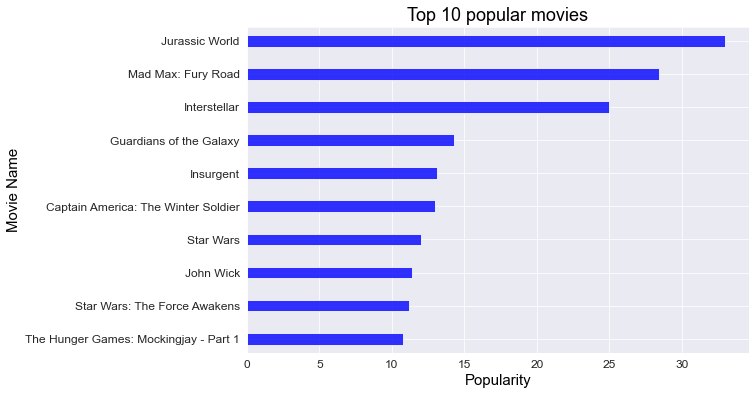

In [42]:
# Top 10 popular movies bar chart

top_ten_popular.groupby("original_title")["popularity"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["blue"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Popularity",fontsize=15, color="k")
plt.title("Top 10 popular movies", fontsize=18, color="k");

### Answer 1
* From above visualisation we can conclude that the most popular movie is Jurassic World with popularity 32.98.

### Research Question 2
> #### What's the top rated movies considering both (vote_count) and (vote average)? (top 10)

In [43]:
# Cheking top 10 vote_average movies and their vote_counts

movies_clean.nlargest(10,"vote_average")[["original_title","vote_average","vote_count"]]

,original_title,vote_average,vote_count
3894,The Story of Film: An Odyssey,9.2,14
538,The Mask You Live In,8.9,11
1200,Black Mirror: White Christmas,8.8,41
2269,Life Cycles,8.8,27
6911,Pink Floyd: Pulse,8.7,23
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6,10
3224,John Mayer: Where the Light Is Live in Los Ang...,8.5,16
3690,The Art of Flight,8.5,60
5830,Doctor Who: The Time of the Doctor,8.5,26
8221,A Personal Journey with Martin Scorsese Throug...,8.5,11


**(From above table we can see that top 10 movies with high average vote have a very low votes; so we can not consider these movies as top rated movies.)**

In [44]:
# Cheking top 10 vote_counts and their average_vote

top_ten_rated = movies_clean.nlargest(10,"vote_count")[["original_title","vote_average","vote_count"]]
top_ten_rated

,original_title,vote_average,vote_count
1919,Inception,7.9,9767
4361,The Avengers,7.3,8903
1386,Avatar,7.1,8458
2875,The Dark Knight,8.1,8432
4364,Django Unchained,7.7,7375
4382,The Hunger Games,6.7,7080
5425,Iron Man 3,6.9,6882
4363,The Dark Knight Rises,7.5,6723
629,Interstellar,8.0,6498
4367,The Hobbit: An Unexpected Journey,6.9,6417


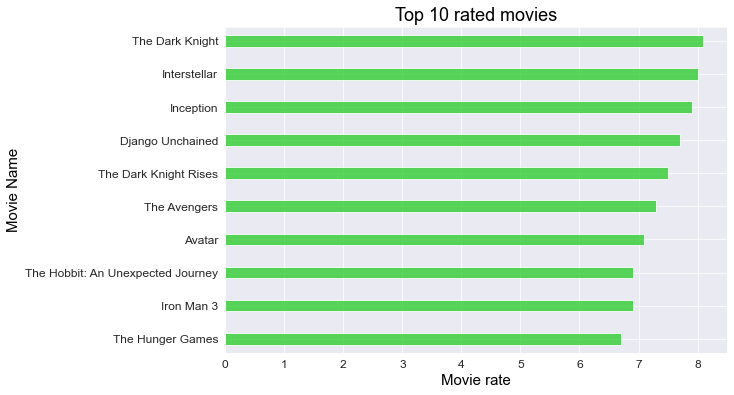

In [45]:
# Groupby top ten rated movies (with high vote counts)

top_ten_rated.groupby("original_title")["vote_average"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["limegreen"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie rate",fontsize=15, color="k")
plt.title("Top 10 rated movies", fontsize=18, color="k");

### Answer 2

* From above visualisation we can conclude that the most high rated movie is `The Dark Knight` with vote average 8.1 and 8432 votes.

### Research Question 3

> #### Which movies have the highest runtime? (top 10)

In [46]:
# check the movies which has highest runtime

most_watched = movies_clean.nlargest(10,"runtime")[["original_title","runtime"]]
most_watched

,original_title,runtime
3894,The Story of Film: An Odyssey,900
4041,Taken,877
2722,Band of Brothers,705
6176,Shoah,566
6181,"North and South, Book I",561
6894,Planet Earth,550
2214,The Pacific,540
3356,John Adams,501
1865,Life,500
3141,Generation Kill,470


In [47]:
# Groupby most_watched movies
most_watched.groupby("original_title")["runtime"].sum().sort_values()

original_title
Generation Kill                  470
Life                             500
John Adams                       501
The Pacific                      540
Planet Earth                     550
North and South, Book I          561
Shoah                            566
Band of Brothers                 705
Taken                            877
The Story of Film: An Odyssey    900
Name: runtime, dtype: int64

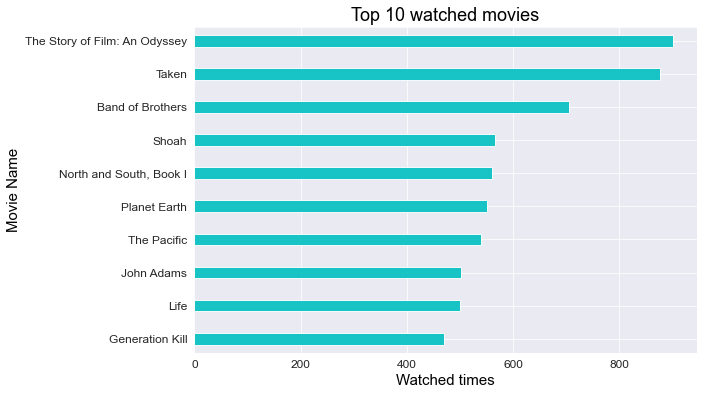

In [48]:
# most_watched movies bar chart

most_watched.groupby("original_title")["runtime"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["c"],
                                                                                 alpha = 0.9,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Watched times",fontsize=15, color="k")
plt.title("Top 10 watched movies", fontsize=18, color="k");

### Answer 3

* From above visualisation we can conclude that the most watched movie is `The Story of Film: An Odyssey` with 900 runtimes.

### Research Question 4

> ####  Which year and which Month released highest number of movies?

In [49]:
# check the year which released highest number of movies using groupby

high_year = movies_clean.groupby("release_year")["original_title"].count().sort_values(ascending=False)
high_year = high_year[:10][:]
high_year 

release_year
2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
2007    438
2006    408
Name: original_title, dtype: int64

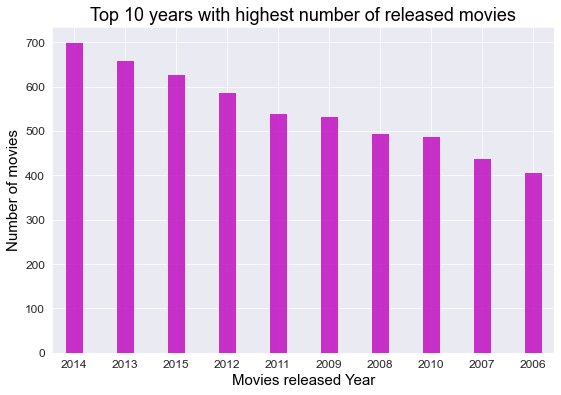

In [50]:
# high_years with most released movies bar chart

high_year.plot(kind="bar",
               rot = 0,
               width = 0.35,
               color=["m"],
               alpha = 0.8,
               fontsize = 12,
               figsize=(9,6),
              )

plt.ylabel("Number of movies",fontsize=15, color="k")
plt.xlabel("Movies released Year",fontsize=15, color="k")
plt.title("Top 10 years with highest number of released movies", fontsize=18, color="k");

In [51]:
high_month = movies_clean.groupby("month")["original_title"].count().sort_values(ascending=False)
high_month

month
September    1331
October      1153
December      985
January       919
August        918
June          827
March         822
November      814
May           809
July          799
April         797
February      691
Name: original_title, dtype: int64

### Answer 4

* From above visualisation and data we can see that 2014 is the highest year according to number of released movies with total 700 movie. September s the highest month according to number of released movies with total 1331 movie

### Research Question 5

> #### Which genre has the highest movies release?

In [52]:
def values_to_dictionary(name):
    """
    this function made to make a dictionary with all unique values on column and count of every value.
    
    INPUT:
    name : cell content from spesific column
    OUTPUT:
    there's no output but function is appending every unique value and it's count to "genres_dic" dictionary
    """
    for value in name.split("|"):
        genres_dic[value] =genres_dic.get(value, 0)+ 1

In [53]:
# extract geners to genres_dic with counts of every genre using values_to_dictionary function
genres_dic = {}
movies_clean.genres.apply(lambda x : values_to_dictionary(x))
genres_dic

{'Action': 2384,
 'Adventure': 1471,
 'Science Fiction': 1229,
 'Thriller': 2907,
 'Fantasy': 916,
 'Crime': 1354,
 'Western': 165,
 'Drama': 4760,
 'Family': 1231,
 'Animation': 699,
 'Comedy': 3793,
 'Mystery': 810,
 'Romance': 1712,
 'War': 270,
 'History': 334,
 'Music': 408,
 'Horror': 1637,
 'Documentary': 520,
 'TV Movie': 167,
 'no gener': 23,
 'Foreign': 188}

In [54]:
# make a Series from genres_dic
genres_count = pd.Series(genres_dic).sort_values()

# drop no gener 

genres_count.drop("no gener", inplace = True)
genres_count

Western             165
TV Movie            167
Foreign             188
War                 270
History             334
Music               408
Documentary         520
Animation           699
Mystery             810
Fantasy             916
Science Fiction    1229
Family             1231
Crime              1354
Adventure          1471
Horror             1637
Romance            1712
Action             2384
Thriller           2907
Comedy             3793
Drama              4760
dtype: int64

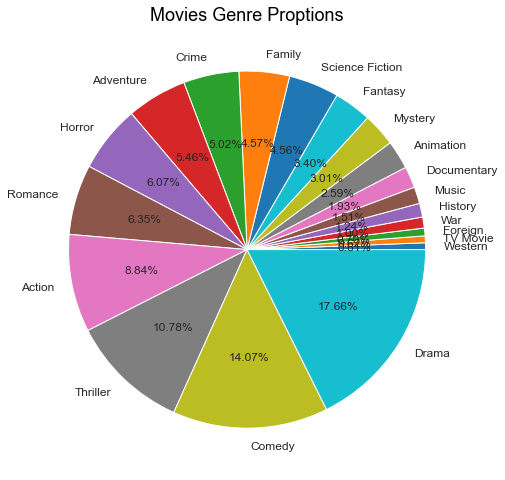

In [55]:
genres_count.plot(kind="pie",
                  autopct = "%.2f%%",
                  fontsize = 12,
                  #colors = ['red', 'pink'],
                  figsize=(8,18),)
plt.rcParams['font.size'] = 15;
plt.ylabel("")
plt.title("Movies Genre Proptions", fontsize=18, color="k");
#plt.legend(genres_count.index,fontsize=12,loc=(1.19,0.2));

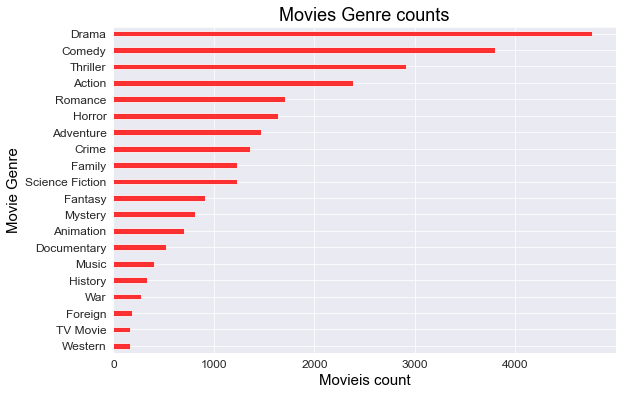

In [56]:
# Movies genres bar chart

genres_count.plot(kind="barh",
                  rot = 0,
                  width = 0.35,
                  color=["red"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(9,6),
                  )

plt.ylabel("Movie Genre",fontsize=15, color="k")
plt.xlabel("Movieis count",fontsize=15, color="k")
plt.title("Movies Genre counts", fontsize=18, color="k");

### Answer 5

* From above visualisations we can see that `Drama` genre has the highest movies release with 4760 movie and 17.66% percentage from all genres.`Comedy` genre in the second place with 3793 movie and 14.07% percentage.

### Research Question 6

> #### Which movie has the highest budget?

In [57]:
# check movie with highest budget

max_budget = movies_clean[movies_clean.budget_adj == movies_clean.budget_adj.max()]
max_budget[["original_title","budget_adj"]]

,original_title,budget_adj
2244,The Warrior's Way,425000000.0


### Answer 6

* From above information we can conclude that `The Warrior's Way` has the highest budget which is estimated to "425000000.0" dollars.

### Research Question 7

> ####  Which movie made the highest revenue?

In [58]:
# check movie with highest revenue

max_revenue = movies_clean[movies_clean.revenue_adj == movies_clean.revenue_adj.max()]
max_revenue[["original_title","revenue_adj"]]

,original_title,revenue_adj
1386,Avatar,2.827124e+09


### Answer 7

* From above information we can conclude that `Avatar` made the highest revenue which is estimated to `2827123750.41` dollars.   

### Research Question 8

> ####  Which movie made the highest profit?

In [59]:
# check movie with highest profit

max_profit = movies_clean[movies_clean.profit == movies_clean.profit.max()]
max_profit[["original_title","profit"]]

,original_title,profit
1329,Star Wars,2.750137e+09


### Answer 8

* From above information we can conclude that `Star Wars` has the highest profit which is estimated to  `2750136650.92` dollars.

### Research Question 9

> ####  which production company made highest profit and which one has the highest budget?

In [60]:
# check the production_companies highest profit

comp_profits = movies_clean.groupby("production_companies")["profit"].sum().sort_values(ascending=False)
comp_profits[0:1]

production_companies
Paramount Pictures    9.334737e+09
Name: profit, dtype: float64

In [61]:
# check the production_companies highest budget

comp_profits = movies_clean.groupby("production_companies")["budget_adj"].sum().sort_values(ascending=False)
comp_profits[0:1]

production_companies
Paramount Pictures    3.398610e+09
Name: budget_adj, dtype: float64

In [62]:
# Paramount Pictures compant total number of movies

paramount_total_movies = movies_clean.query("production_companies == 'Paramount Pictures'")["original_title"].count()
paramount_total_movies

156

### Answer 9

* From above information we can conclude that `Paramount Pictures` company is the one with the highest profit and highest budget. It produced 156 movie with profit `9334737385.97` dollars and budget`3398609803.25` dollars.

#### Qick look on correlation table and heatmap

In [63]:
#cheking the correlations

movies_clean.corr()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.000000,0.139032,0.800828,0.209517,0.089806,0.435258,0.561746,0.516840
runtime,0.139032,1.000000,0.163273,0.156813,-0.117187,0.329073,0.263914,0.235164
vote_count,0.800828,0.163273,1.000000,0.253818,0.107962,0.523415,0.666495,0.614036
vote_average,0.209517,0.156813,0.253818,1.000000,-0.117576,0.111789,0.242319,0.288569
release_year,0.089806,-0.117187,0.107962,-0.117576,1.000000,0.036982,-0.099447,-0.132111
budget_adj,0.435258,0.329073,0.523415,0.111789,0.036982,1.000000,0.570390,0.404285
revenue_adj,0.561746,0.263914,0.666495,0.242319,-0.099447,0.570390,1.000000,0.981856
profit,0.516840,0.235164,0.614036,0.288569,-0.132111,0.404285,0.981856,1.000000


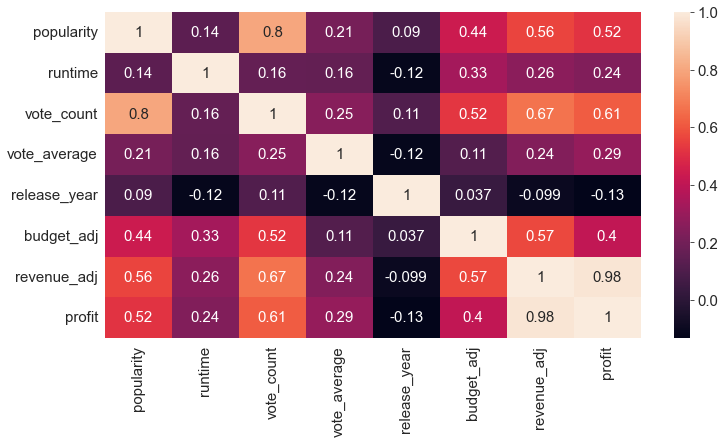

In [64]:
# heatmap

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(movies_clean.corr(), annot=True, ax=ax);

### Research Question 10

> #### Is there a correlation between budget and profit?

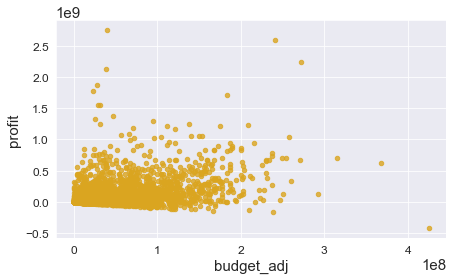

In [65]:
# Scatter plot between budget and profit 

movies_clean.plot(kind="scatter",
                  rot = 0,
                  x = 'budget_adj',
                  y = 'profit',
                  color=["goldenrod"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );


### Answer 10

* From above visualisation we can conclude that there is a very strong positive correlation between budget and profit. This is the reason behind `Paramount Pictures` company high profits. they are spending a lot of money on budget!

### Research Question 11

> ####  Is there a correlation between popularity and profit?


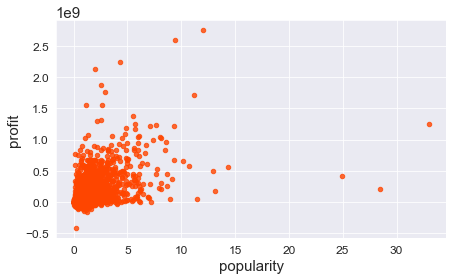

In [66]:
# Scatter plot between popularity and profit 

movies_clean.plot(kind="scatter",
                  rot = 0,
                  x = 'popularity',
                  y = 'profit',
                  color=["orangered"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

### Answer 11

* From above visualisation we can conclude that there is a strong positive correlation between budget and profit but it's not as strong as correlation with budget.

### Research Question 12

> ####  Is there a correlation between runtime and profit?

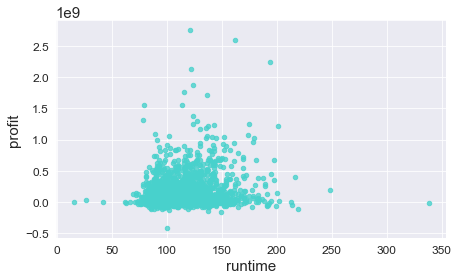

In [67]:
# Scatter plot between runtimes and profit 

movies_clean.plot(kind="scatter",
                  rot = 0,
                  x = 'runtime',
                  y = 'profit',
                  color=["mediumturquoise"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

### Answer 12

* From above visualisation we can conclude that there is no correlation to consider between runtime and profit.

### Research Question 13

> #### Is there a correlation between vote_count and popularity?

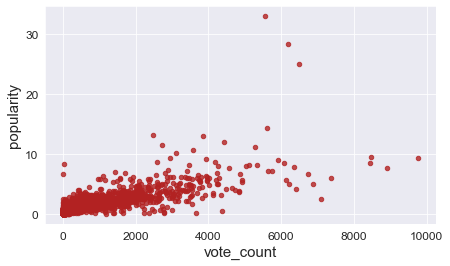

In [68]:
# Scatter plot between vote_count and popularity 

movies_clean.plot(kind="scatter",
                  rot = 0,
                  x = 'vote_count',
                  y = 'popularity',
                  color=["firebrick"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

### Answer 13

* From above visualisation we can conclude that there is a very strong positive correlation between vote numbers and popularity.

### Research Question 14

> #### Is there a correlation between vote_count and profit?

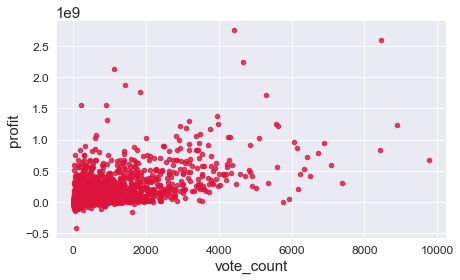

In [69]:
# Scatter plot between vote_count and profit 

movies_clean.plot(kind="scatter",
                  rot = 0,
                  x = 'vote_count',
                  y = 'profit',
                  color=["crimson"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

### Answer 14

* From above visualisation we can conclude that there is a strong positive correlation between vote numbers and profit.

<a id='conclusions'></a>
## Conclusions

**1. The most popular movie is Jurassic World with popularity 32.98.**

**2. The most high rated movie is The Dark Knight with vote average 8.1 and 8432 votes.**

**3. The most watched movie is The Story of Film: An Odyssey with 900 runtimes.**

**4. 2014 is the highest year according to number of released movies with total 700 movie. September is the highest month according to number of released movies with total 1331 movie**

**5. The `Drama` genre has the highest movies release with 4760 movie and 17.66% percentage from all genres.`Comedy` genre in the second place with 3793 movie and 14.07% percentage.**

**6. The `The Warrior's Way` movie has the highest budget which is estimated to "425000000.0" dollars.**

**7. The `Avatar` movie made the highest revenue which is estimated to `2827123750.41` dollars.**

**8. The `Star Wars` movie has the highest profit which is estimated to  `2750136650.92` dollars.**

**9. The `Paramount Pictures` company is the one with the highest profit and highest budget. It produced 156 movie with profit `9334737385.97` dollars and budget`3398609803.25` dollars.**

**10. There is a very strong positive correlation between budget and profit. This is the reason behind Paramount Pictures company high profits. they are spending a lot of money on budget!**

**11. There is a strong positive correlation between budget and profit but it's not as strong as correlation with budget.**

**12. There is no correlation to consider between runtime and profit.**

**13. There is a very strong positive correlation between vote numbers and popularity.**

**14. There is a strong positive correlation between vote numbers and profit.**

## Limitation

> * budget and revenue column has a masive number of values equal zero. that absolutely affect alot of statistics and correlations in this dataset. 
        - budget column has (5696) value equal zero.
        - revenue column has (6016) value equal zero.
        
> * This dataset has avery big number of empty values (NaNs): 
        - imdb_id column has 10 NaNs.
        - .cast column has 76 NaNs.
        - .homepage column has 7930 NaNs.
        - .director column has 44 NaNs.
        - .tagline column has 2824 NaNs.
        - .keywords column has 1493 NaNs.
        - .overview column has 4 NaNs.
        - .genres column has 23 NaNs.
        - .production_companies has 1030 NaNs.

> * Genres column has multiple values and there is no indication about main genre so we can not be sure from all statistics which depends on genre is accurate or not.

> **(So we can't calculate statistics or find correlation accurately to make better predictions.)**